             Date        Time State     Group  Unit  Sales
0      1-Oct-2020     Morning    WA      Kids     8  20000
1      1-Oct-2020     Morning    WA       Men     8  20000
2      1-Oct-2020     Morning    WA     Women     4  10000
3      1-Oct-2020     Morning    WA   Seniors    15  37500
4      1-Oct-2020   Afternoon    WA      Kids     3   7500
...           ...         ...   ...       ...   ...    ...
7555  30-Dec-2020   Afternoon   TAS   Seniors    14  35000
7556  30-Dec-2020     Evening   TAS      Kids    15  37500
7557  30-Dec-2020     Evening   TAS       Men    15  37500
7558  30-Dec-2020     Evening   TAS     Women    11  27500
7559  30-Dec-2020     Evening   TAS   Seniors    13  32500

[7560 rows x 6 columns]
Sales mean: 45013.5582010582
Unit mean: 18.00542328042328
Sales median: 35000.0
Unit median: 14.0
Sales mode: 0    22500
Name: Sales, dtype: int64
Unit mode: 0    9
Name: Unit, dtype: int64
Sales standard deviation: 32253.506943966073
Unit standard deviation: 32253.5

/tmp/ipykernel_75/2643032920.py:75: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/tmp/ipykernel_75/2643032920.py:79: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/tmp/ipykernel_75/2643032920.py:83: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



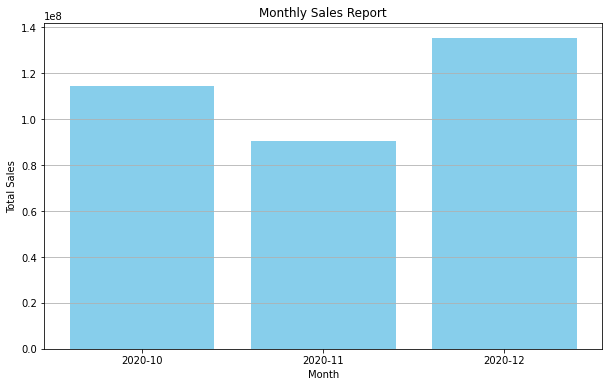

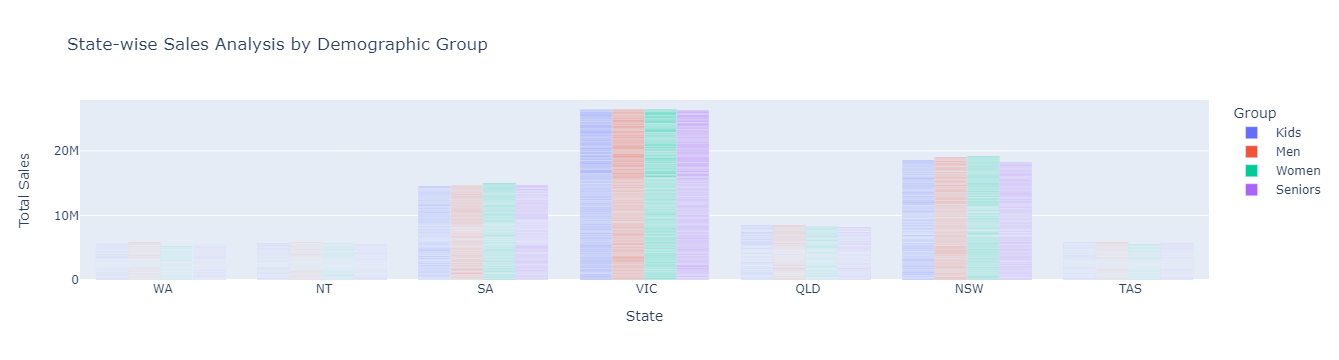

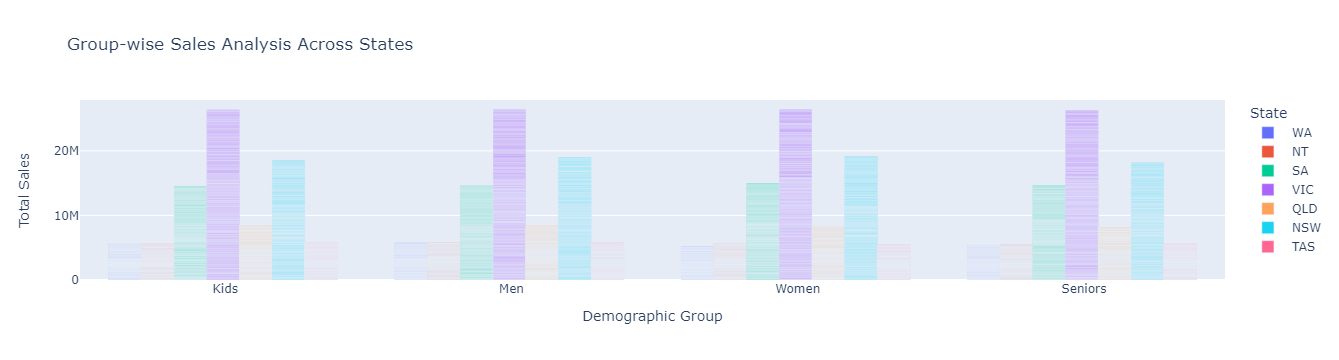

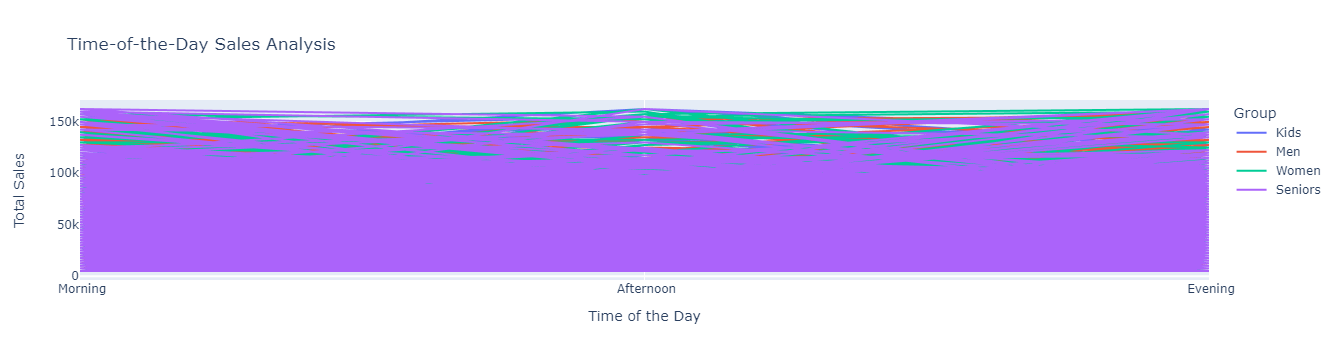

In [9]:
# importing pandas as pd 
import pandas as pd 

import matplotlib.pyplot as plt

import plotly.express as px

# Creating the dataframe  
data = pd.read_csv("AusApparalSales4thQrt2020.csv") 
    
# Cleaned data
cleaned_data = data.dropna()

print(cleaned_data)

# mean, median, mode and standard deviations of sales and unit

mean = data["Sales"].mean()

strmean = str(mean)

print("Sales mean: " + strmean)

mean2 = data["Unit"].mean()

strmean2 = str(mean2)

print("Unit mean: " + strmean2)

median = data["Sales"].median()

strmedian = str(median)

print("Sales median: " + strmedian)

median2 = data["Unit"].median()

strmedian2 = str(median2)

print("Unit median: " + strmedian2)

mode = data["Sales"].mode()

strmode = str(mode)

print("Sales mode: " + strmode)

mode2 = data["Unit"].mode()

strmode2 = str(mode2)

print("Unit mode: " + strmode2)

stddev = data["Sales"].std()

strstddev = str(stddev)

print("Sales standard deviation: " + strstddev)

stddev2 = data["Unit"].std()

strstddev2 = str(stddev2)

print("Unit standard deviation: " + strstddev)

# grouping the data by highest and lowest sales

grouped = data.groupby('Group')['Sales'].sum()

group_with_highest_sales = grouped.idxmax()

group_with_lowest_sales = grouped.idxmin()

print("Group with highest sales: " + group_with_highest_sales)

print("Group with lowest sales: " + group_with_lowest_sales)

# weekly report

data['Date'] = pd.to_datetime(data['Date'])

weekly_report = data.resample('W-Mon', on='Date').sum().reset_index().sort_values(by='Date')

print(weekly_report)

# monthly report

monthly_report = data.resample('M', on='Date').sum().reset_index()

print(monthly_report)

# quarterly report

quarterly_report = data.resample('Q', on='Date').sum().reset_index()

print(quarterly_report)

plt.figure(figsize=(10, 6))
plt.bar(monthly_report['Date'].dt.strftime('%Y-%m'), monthly_report['Sales'], color='skyblue')
plt.title('Monthly Sales Report')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(axis='y')
plt.show()

# state-wise sales, group-wise sales, time of day sales

state_wise_sales = px.bar(data, x='State', y='Sales', color='Group',
                          title="State-wise Sales Analysis by Demographic Group",
                          labels={"Sales": "Total Sales", "State": "State"},
                          barmode='group')

state_wise_sales.show()

group_wise_sales = px.bar(data, x='Group', y='Sales', color='State',
                          title="Group-wise Sales Analysis Across States",
                          labels={"Sales": "Total Sales", "Group": "Demographic Group"},
                          barmode='group')

group_wise_sales.show()

time_of_day_sales = px.line(data, x='Time', y='Sales', color='Group',
                            title="Time-of-the-Day Sales Analysis",
                            labels={"Sales": "Total Sales", "Time": "Time of the Day"})

time_of_day_sales.show()

In [ ]:
# Based on the findings from the data wrangling, I propose the best way to treat the missing values is to drop them. After doing so, the data is significantly
# easier to read. From there, I follow through with both creating visualizations as well as generating important reports and findings such as who hsa the most
# sales, graphs of monthly/weekly/quarterly results, etc. Based on the findings, it would seem that men are the primary market for this brand, with them having
# generated the most sales. Also based on the findings, VIC had the most sales across each state, with NSW being in second. Finally, afternoon hours seem to be the time 
# of day where the most people from the most demographics gather to shop. As a recommended course of action, we should prioritize marketing towards men in VIC during
# afternoon hours first and foremost.